## Linear Regression Visualization

Given a dataset $$\{ (x_i, y_i )\}_{i = 1}^{n}$$ a linear regression model assumes the relationship between the dependent variable $y$ and the vector of regressors $x$ is linear. However in the real world,these relationships are often noisy. So, given a linear regression model with parameters $\beta$, the relationship we are modeling is $$Y = X\beta + \epsilon$$ where 
$$X = \begin{bmatrix}
x_1 & x_2 & ... & x_n\\
\end{bmatrix} \in \mathbb{R}^{n,d}$$

$$Y = \begin{bmatrix}
y_1 & y_2 & ... & y_n\\
\end{bmatrix}^{T} \in \mathbb{R}^{n}$$

$$\epsilon = \begin{bmatrix}
\epsilon_1 & \epsilon_2 & ... & \epsilon_n\\
\end{bmatrix}^{T} \in \mathbb{R}^{n}$$

Here, $\epsilon$ corresponds to a noise term, and in the case of linear regression, $\epsilon \sim \mathcal{N}(0, v)$, in other words the error is assumed to be unbiased and normally distributed.

Fitting a linear model usually requires to minimizing the error of the model.
$$\begin{align}
    Y &= X\beta + \epsilon \\
    Y - X\beta &= \epsilon
    \end{align}$$
    
More formally, linear regression can be formulated as follows:

$$\min_{b}\|\epsilon\|_{2}^{2} = \min_{b}\|Y - X\beta\|_{2}^{2}$$

We can use calculus to solve for $\beta$ that minimizes the following equation.

$$\begin{align}
 \|Y - X\beta\|_{2}^{2} &= \beta^{T}X^{T}X\beta - 2y^{T}X\beta + y^{T}y \\
 \nabla_{\beta} \|Y - X\beta\|_{2}^{2} &= 2X^{T}X\beta - 2X^{T}y = 0 \\
 X^{T}X\beta &= X^{T}y \\
 \beta &= (X^{T}X)^{-1}X^{T}y
 \end{align}$$


## Demonstration of single variable linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML


plt.rcParams['text.usetex'] = True
plt.rcParams['animation.html'] = 'html5'

In [2]:
#create n samples representing the relationship between X and y
n = 100
x_low, x_high = 0, 5
beta_true = 5
eps_sigma = 10
X = np.linspace(x_low, x_high, num=n)
eps = np.random.normal(0, eps_sigma, n)
y = X * beta_true + eps

In [3]:
X.shape

(100,)

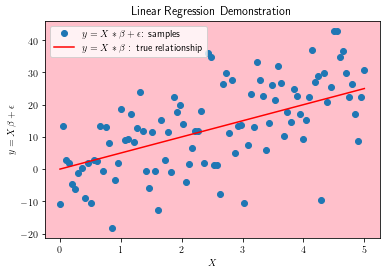

In [4]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', label=r'$y = X * \beta + \epsilon$: samples')
ax.plot(X, X * beta_true, label=r'$y = X * \beta$ : true relationship', color='red')
ax.set(xlabel=r'$X$', ylabel=r'$y = X \beta + \epsilon$', title='Linear Regression Demonstration')
ax.legend()
ax.set_facecolor('pink')
plt.savefig('lr_demo.jpg', dpi=300)

In [5]:
X = np.expand_dims(X, axis=1)
beta_pred = np.linalg.inv(X.T @ X) @ X.T @ y


In [6]:
e = y - X * beta_pred

In [7]:
np.linalg.norm(e, ord=2)

1357.402089028427

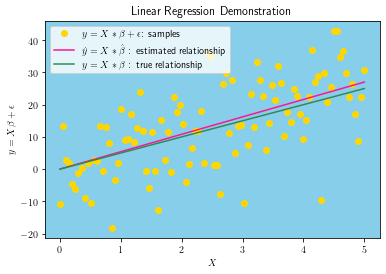

In [8]:
fig, ax = plt.subplots()

ax.plot(X, y, 'o', label=r'$y = X * \beta + \epsilon$: samples', color='gold')
ax.plot(X, X * beta_pred, label=r'$\hat{y} = X * \hat{\beta}$ : estimated relationship', color='deeppink')
ax.plot(X, X * beta_true, label=r'$y = X * \beta$ : true relationship', color='seagreen')
ax.set(xlabel=r'$X$', ylabel=r'$y = X \beta + \epsilon$', title=r'Linear Regression Demonstration')
ax.set_facecolor('skyblue')
ax.legend()
plt.savefig('best_fit.jpg', dpi=300)

### Using Gradient Descent to perform linear regression

Even though we have an explicit rule to solve for the optimal parameters $\beta$ given a set of datapoints $\{ (x_i, y_i )\}_{i = 1}^{n}$ for linear regression, we can also use the power of gradient descent to solve for an optimal value of $\beta$ as well. Lets go ahead and demonstrate how we can do the following with Stochastic Gradient Descent as our gradient descent algorithm of choice. 

Recall the formulation of Linear Regression:

$$\min_{b}\|\epsilon\|_{2}^{2} = \min_{b}\|Y - X\beta\|_{2}^{2} = \min_{b}L(\beta)$$

Now we can use calculus to solve for $\nabla_{\beta} L(\beta) $.

$$\begin{align}
L(\beta) &= \beta^{T}X^{T}X\beta - 2y^{T}X\beta + y^{T}y \\
 \nabla_{\beta}L(\beta) &= 2X^{T}X\beta - 2X^{T}y\\
 \end{align}
$$

With an explicit form for $\nabla_{\beta} L(\beta) $ we can now use SGD to optimize $\beta$.

Recall the update rule for SGD with learning rate $\lambda$ at timestep $t$

$$\beta_{t} = \beta_{t - 1} - \nabla_{\beta}L(\beta_{t-1}) * \lambda$$

Now substituting for $\nabla_{\beta} L(\beta) $, we now have an explicit update rule to optimize beta! Here is the update rule below:

$$b_{t} = b_{t - 1} - (2X^{T}X\beta_{t-1} - 2X^{T}y) * \lambda$$

Now, we can optimize $\beta$ with a random initialization for $\beta_{0}$.

In [9]:
#create n samples representing the relationship between X and y
n = 100
x_low, x_high = 0, 5
beta_true = 2
eps_sigma = 1
X = np.linspace(x_low, x_high, num=n)
eps = np.random.normal(0, eps_sigma, n)
y = X * beta_true + eps

X = np.expand_dims(X, axis=1)

In [10]:
num_iters = 100
learning_rate = 1e-4
beta = np.random.normal(0, 5, 1)
hist = []

def grad(X, y, b):
    return (2 * X.T @ X @ b) - (2 * X.T @ y)

def loss(X, y, b):
    return np.linalg.norm(y - (X * b), ord=2)

for _ in range(num_iters):
    beta = beta - grad(X, y, beta) * learning_rate
    hist.append((beta, loss(X, y, beta)))

In [11]:

fig, (pred, loss,) = plt.subplots(2, figsize = (6, 15))
fig.suptitle('Demonstration of using SGD to optimize Least Squares model')
pred.set(xlim=[0, 5], ylim=[0, 10], xlabel=r'$X$', ylabel=r'$y = X \beta + \epsilon$')
loss.set(xlim=[0, len(hist)], ylim=[200, 1500], xlabel=r'timesteps (t)', ylabel='\|\epsilon\|_{2}^{2}')

def animate(i):
    b_i, _ = hist[i]
    pred.clear() 
    pred.set(xlim=[0, 5], ylim=[0, 10], xlabel=r'$X$', ylabel=r'$y = X \beta + \epsilon$', title='Linear Regression with SGD $\lambda$ = 1e-3')
    pred.plot(X, y, 'o', label=r'$y = X * \beta + \epsilon$: samples', color='gold')
    pred.plot(X, X * b_i, label=r'$\hat{y} = X * \hat{\beta}$ : estimated relationship', color='deeppink')
    pred.plot(X, X * beta_true, label=r'$y = X * \beta$ : true relationship', color='red')
    pred.set_facecolor('skyblue')
    pred.legend()
    
    loss.clear()
    losses = [l for b, l in hist][:i]
    loss.set(xlim=[0, len(hist)], ylim=[200, 1500], xlabel=r'timesteps (t)', ylabel=r'loss = $\|\epsilon\|_{2}^{2}$', title=r'loss: $\|Y - X \beta \|_{2}^{2}$ at timestep (t)')
    loss.plot(list(range(i)), losses, label='loss at time (t)', color='red')
    loss.set_facecolor('skyblue')
    loss.legend()

anim = animation.FuncAnimation(fig, animate, num_iters)
plt.close()
anim.save('linear_regression.gif')
HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.
